In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df_train = pd.read_csv('/Users/ivanmac/Desktop/Kaggle/Quora Question Pairs/train.csv', index_col='id' )
df_train.head(3)

,qid1,qid2,question1,question2,is_duplicate
id,,,,,
0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0


In [5]:
df_train.describe(include='all')

,qid1,qid2,question1,question2,is_duplicate
count,404290.000000,404290.000000,404290,404288,404290.000000
unique,NaN,NaN,290457,299174,NaN
top,NaN,NaN,How do I improve my English speaking?,How can you look at someone's private Instagra...,NaN
freq,NaN,NaN,50,120,NaN
mean,217243.942418,220955.655337,NaN,NaN,0.369198
std,157751.700002,159903.182629,NaN,NaN,0.482588
min,1.000000,2.000000,NaN,NaN,0.000000
25%,74437.500000,74727.000000,NaN,NaN,0.000000
50%,192182.000000,197052.000000,NaN,NaN,0.000000
75%,346573.500000,354692.500000,NaN,NaN,1.000000


In [6]:
qids = pd.Series(df_train['qid1'].tolist() + df_train['qid2'].tolist())

def Statistics(data):

    print('Amount of all questions: {}'.format(len(qids)))
    print('Amount of a unique questions: {}'.format((qids.nunique())))
    print('Amount of a Not unique questions: {}'.format((len(qids)-qids.nunique())))
    print('Amount of questions that appear more than once: {}'.format(np.sum((qids.value_counts() >1))))
    print('--------------------------------------------------------')
    print('Amount of pair questions is: {}'.format(len(data)))
    print('How much of pair questions are duplicated: {}%'.format(round(data.is_duplicate.mean()*100, 3)))
    

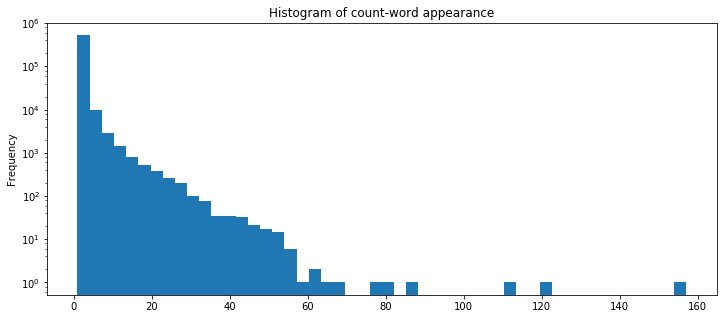

In [7]:


qids.value_counts().plot(kind='hist', logy='log', style='fivethirtyeight',
                        title='Histogram of count-word appearance',  
                        figsize=(12, 5), bins=50)

In [8]:
Statistics(df_train)

Amount of all questions: 808580
Amount of a unique questions: 537933
Amount of a Not unique questions: 270647
Amount of questions that appear more than once: 111780
--------------------------------------------------------
Amount of pair questions is: 404290
How much of pair questions are duplicated: 36.92%


In [10]:
df_test = pd.read_csv('/Users/ivanmac/Desktop/Kaggle/Quora Question Pairs/test.csv', index_col='test_id')
df_test.head(3)

,question1,question2
test_id,,
0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,What but is the best way to send money from Ch...,What you send money to China?


In [11]:
#There are no quids columns in df_test, so that all that we can show 
print('Amount of pair questions is: {}'.format(len(df_test)))

Amount of pair questions is: 2345796


In [12]:
#Combine all questions together
train_qs = pd.Series(df_train['question1'].tolist() + df_train['question2'].tolist()).astype(str)
test_qs = pd.Series(df_test['question1'].tolist() + df_test['question2'].tolist()).astype(str)

(-0.5, 679.5, 419.5, -0.5)

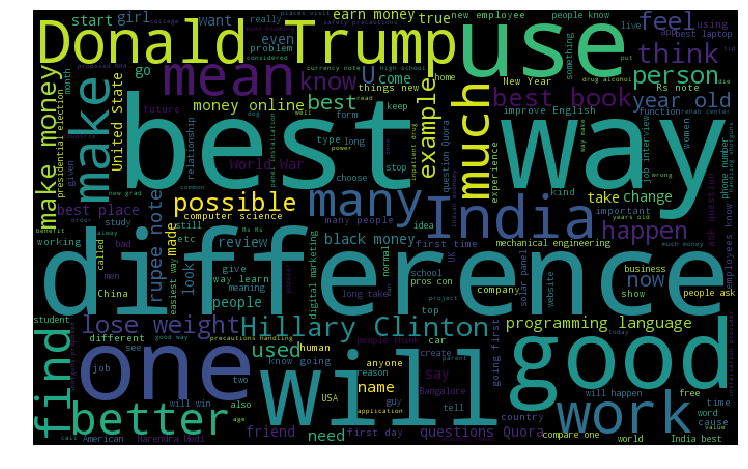

In [13]:
from wordcloud import WordCloud
cloud = WordCloud(width=680, height=420).generate(" ".join(train_qs.astype(str)))
plt.figure(figsize=(14, 8))
plt.imshow(cloud)
plt.axis('off')

In [14]:
def Semantic_Statistics(data):
    
    qmarks = np.mean(data.apply(lambda x: '?' in x))
    math = np.mean(data.apply(lambda x: '[math]' in x))
    fullstop = np.mean(data.apply(lambda x: '.' in x))
    capital_first = np.mean(data.apply(lambda x: x[0].isupper()))
    capitals = np.mean(data.apply(lambda x: max([y.isupper() for y in x])))
    numbers = np.mean(data.apply(lambda x: max([y.isdigit() for y in x])))

    print('Questions with question marks: {:.2f}%'.format(qmarks * 100))
    print('Questions with [math] tags: {:.2f}%'.format(math * 100))
    print('Questions with full stops: {:.2f}%'.format(fullstop * 100))
    print('Questions with capitalised first letters: {:.2f}%'.format(capital_first * 100))
    print('Questions with capital letters: {:.2f}%'.format(capitals * 100))
    print('Questions with numbers: {:.2f}%'.format(numbers * 100))

In [15]:
#the data is almost identical either in train & test data 
Semantic_Statistics(train_qs)
print('----------------------')
Semantic_Statistics(test_qs)

Questions with question marks: 99.87%
Questions with [math] tags: 0.12%
Questions with full stops: 6.31%
Questions with capitalised first letters: 99.81%
Questions with capital letters: 99.95%
Questions with numbers: 11.83%
----------------------
Questions with question marks: 99.39%
Questions with [math] tags: 0.17%
Questions with full stops: 6.90%
Questions with capitalised first letters: 99.78%
Questions with capital letters: 99.94%
Questions with numbers: 12.66%


In [16]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from string import punctuation
import string

from sklearn.feature_extraction.text import TfidfVectorizer


In [74]:
# DATA PREPARATION


def data_pr(data):

    data['question1'].fillna(value=' ', inplace=True)
    data['question2'].fillna(value=' ', inplace=True)
    
    data['q1_len'] = data['question1'].str.len() #lenght of characters of sentence  
    data['q2_len'] = data['question2'].str.len()

    def word_match(row):
        w1 = set(map(lambda word: word.lower().strip(), str(row['question1']).split(" "))) #word share of sentence  
        w2 = set(map(lambda word: word.lower().strip(), str(row['question2']).split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

    data['word_match'] = data.apply(word_match, axis=1)


    data['q1_n_words'] = data['question1'].apply(lambda row: len(str(row).split(" "))) #number of words
    data['q2_n_words'] = data['question2'].apply(lambda row: len(str(row).split(" ")))

    data['qs_N_diff_words'] = round(data['q1_n_words'] / data['q2_n_words'])
    


In [12]:
#stop_words = set(stopwords.words("english"))
#ps = PorterStemmer()
#snw = SnowballStemmer("english")


'''
###WORKING WITH DATAFRAME
def tfidf(data):
    data['question1'] = data.apply(lambda row: word_tokenize(str(row['question1']).lower()), axis=1)
    data['question2'] = data.apply(lambda row: word_tokenize(str(row['question2']).lower()), axis=1)


    data['question1'] = data.apply(lambda row: 
                                           [snw.stem(w) for w in row['question1'] if w not in stop_words], axis=1)
    data['question2'] = data.apply(lambda row: 
                                           [snw.stem(w) for w in row['question2'] if w not in stop_words], axis=1)


    data['question1'] = data.apply(lambda row: "".join([" "+i if not i.startswith("'") 
            and i not in string.punctuation else i for i in row['question1']]).strip(), axis=1)
    data['question2'] = data.apply(lambda row: "".join([" "+i if not i.startswith("'") 
            and i not in string.punctuation else i for i in row['question2']]).strip(), axis=1)
'''   

'''
###WORKING WITH NO DATAFRAME
words1 = df_train_min.apply(lambda row: word_tokenize(row['question1']), axis=1)
words2 = df_train_min.apply(lambda row: word_tokenize(row['question1']), axis=1)


filtered_sentence1 = [ps.stem(w.lower()) for w in words1 if w not in stop_words] #stemming + lower + stopwords
filtered_sentence1 = [ps.stem(w.lower()) for w in words2 if w not in stop_words] #stemming + lower + stopwords

"".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in filtered_sentence1]).strip() 
"".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in filtered_sentence2]).strip() 
'''

'''
###TAKE TFIDF BULIT IN FUNCTION, KERNEL CRUSHES!!!  
tfdf_train = TfidfVectorizer(max_features = 328, stop_words='english').fit_transform(train_qs.values) #tfidf of sentence
tfdf_test = TfidfVectorizer(max_features = 328, stop_words='english').fit_transform(test_qs.values) #tfidf of sentence
tfdf_train = tfdf_train.toarray()
tfdf_test = tfdf_test.toarray()


df_train['tfidf_word_match'] = np.abs(tfdf_train[::2] - tfdf_train[1::2]) #difference tfidf of quest1 & quest2
df_test['tfidf_word_match'] = np.abs(tfdf_test[::2] - tfdf_test[1::2]) #difference tfidf of quest1 & quest2    
'''


,id,qid1,qid2,question1,question2,is_duplicate,tfidf_word_match
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"(0, 115)\t0.536853590996\n (0, 142)\t0.8436..."
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"(0, 115)\t0.536853590996\n (0, 142)\t0.8436..."
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"(0, 115)\t0.536853590996\n (0, 142)\t0.8436..."
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"(0, 115)\t0.536853590996\n (0, 142)\t0.8436..."
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"(0, 115)\t0.536853590996\n (0, 142)\t0.8436..."


In [75]:
data_pr(df_train)
data_pr(df_test)
#df_test_min = df_test.head(10).copy() #df_test_min = df_test.loc[100000:110000,:]
#df_train_min = df_train.head(10).copy()
#tfidf(df_train)
#tfidf(df_test)

In [78]:
df_test.isnull().sum()

test_id            0
question1          0
question2          0
q1_len             0
q2_len             0
word_match         0
q1_n_words         0
q2_n_words         0
qs_N_diff_words    0
dtype: int64

In [79]:
df_test.isnull().sum()

test_id            0
question1          0
question2          0
q1_len             0
q2_len             0
word_match         0
q1_n_words         0
q2_n_words         0
qs_N_diff_words    0
dtype: int64

In [105]:
from sklearn import linear_model
import numpy as np

#Creating Features & Labeles
X = np.array(df_train.drop(['id','is_duplicate','qid1','qid2','question1','question2', ], 1))
y = np.array(df_train['is_duplicate'])

#Creating classifier and training the data
clf = logistic = linear_model.LogisticRegression()
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [106]:
#Predicting what pair of questions are duplicated and what aren't  
#df_test = df_test.drop([['question1'],['question2'],['test_id']], inplace=True, axis=1)

prediction = (clf.predict(df_test))


submission = pd.DataFrame({
    "test_id": df_test.index ,
    "is_duplicate": prediction
    }).set_index('test_id').to_csv('quora_submission.csv')




In [52]:
df = pd.DataFrame({'docId': [1,2,3], 
               'sent': ['This is the first sentence','This is the second sentence', 'This is the third sentence']})

df_train_min = df_train.head(100).copy()
df_train_min


v = TfidfVectorizer(max_features=100).fit_transform(df_train_min['question1'])
x = v.fit_transform(df['sent'])
df['tfidf'] = x
df

,docId,sent,tfidf
0,1,This is the first sentence,"(0, 6)\t0.381614145814\n (0, 1)\t0.38161414..."
1,2,This is the second sentence,"(0, 6)\t0.381614145814\n (0, 1)\t0.38161414..."
2,3,This is the third sentence,"(0, 6)\t0.381614145814\n (0, 1)\t0.38161414..."


In [53]:
df['tfidf'] = x.toarray()
df


,docId,sent,tfidf
0,1,This is the first sentence,0.646129
1,2,This is the second sentence,0.000000
2,3,This is the third sentence,0.000000


In [40]:
print(len(df_train_min))
print(len(df_train_min.index))
len(df_train_min) == len(df_train_min.index)

100
100


True